# **PRÁCTICA 1 - Parte 1: CNNs**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

# **Ejercicio EXTRA 1**

Con lo que has aprendido genera un modelo para resolver el problema de la base de datos cifar100. Guarda la estructura del modelo, las curvas de aprendizaje, loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros.

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 100
optimizer = Adam()
validation_split = 0.2
verbosity = 1

In [2]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/100
800/800 [==============================] - 67s 83ms/step - loss: 1.5867 - accuracy: 0.4077 - val_loss: 1.3494 - val_accuracy: 0.5228
Epoch 2/100
800/800 [==============================] - 65s 81ms/step - loss: 1.2097 - accuracy: 0.5657 - val_loss: 1.1657 - val_accuracy: 0.5911
Epoch 3/100
800/800 [==============================] - 65s 81ms/step - loss: 1.0339 - accuracy: 0.6345 - val_loss: 1.0041 - val_accuracy: 0.6419
Epoch 4/100
800/800 [==============================] - 65s 81ms/step - loss: 0.9082 - accuracy: 0.6806 - val_loss: 0.9279 - val_accuracy: 0.6764
Epoch 5/100
800/800 [==============================] - 65s 81ms/step - loss: 0.8118 - accuracy: 0.7138 - val_loss: 0.9013 - val_accuracy: 0.6834
Epoch 6/100
800/800 [==============================] - 67s 84ms/step - loss: 0.7374 - accuracy: 0.7390 - val_loss: 0.8581 - val_accuracy: 0.7025
Epoch 7/100
800/800 [==============================] - 64s 80ms/step - loss: 0.6688 - accuracy: 0.7663 - val_loss: 0.9193 - val_ac

In [4]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.042787790298462 / Test accuracy: 0.6955999732017517


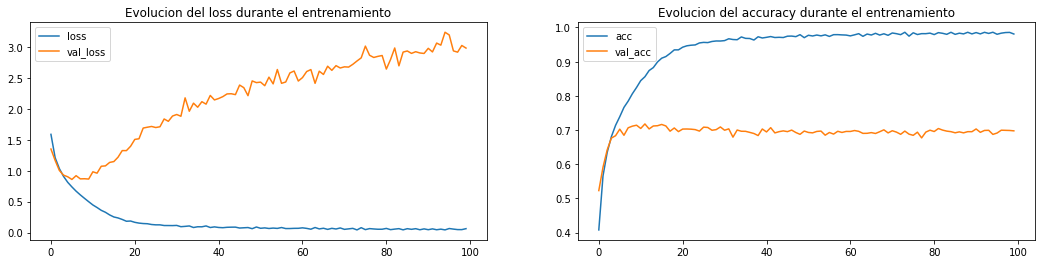

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(history.history['loss'],label="loss")
ax0.plot(history.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(history.history['accuracy'],label="acc")
ax1.plot(history.history['val_accuracy'],label="val_acc")
ax1.legend()